# Financial News Dataset - Exploratory Data Analysis (EDA)

## Project Overview
This notebook performs comprehensive exploratory data analysis on a large financial news dataset containing **1.4+ million news articles**. Our goal is to understand the characteristics of financial news data as a foundation for sentiment analysis and correlation with stock price movements.

## Dataset Description
- **Source**: Financial News and Stock Price Integration Dataset (FNSPID)
- **Size**: 1,407,328 news articles
- **Time Period**: 2020-2021 (based on sample data)
- **Key Fields**:
  - `headline`: News article titles/headlines
  - `url`: Links to full articles
  - `publisher`: News source/author
  - `date`: Publication timestamp (UTC-4 timezone)
  - `stock`: Stock ticker symbol (e.g., AAPL, TSLA)

## Analysis Objectives
1. **Text Analysis**: Understand headline characteristics and extract key topics
2. **Publisher Analysis**: Identify most active news sources and their focus areas
3. **Temporal Patterns**: Discover publication frequency trends and timing patterns
4. **Data Quality**: Assess completeness and identify any data issues

## Setup and Configuration
First, we'll configure our environment for dynamic module reloading and import necessary libraries.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

### Import Libraries and Custom Modules
We import our custom EDA modules that implement object-oriented analysis classes for modular and reusable code.

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to path to import modules
# This handles running from 'notebooks' dir or project root
current_dir = os.getcwd()
if os.path.basename(current_dir) == "notebooks":
    project_root = os.path.abspath(os.path.join(current_dir, ".."))
else:
    project_root = current_dir

if project_root not in sys.path:
    sys.path.append(project_root)

from src.core.data_loader import DataLoader
from src.core.eda import EDAAnalyzer
from src.core.visualizer import Visualizer

## 1. Data Loading and Initial Inspection

Let's load the financial news dataset and examine its basic structure.

In [3]:
# Initialize DataLoader
loader = DataLoader()

# Path to the raw data
file_path = "../data/raw/raw_analyst_ratings.csv"

# Load data
try:
    df = loader.load_news_data(file_path)
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(
        f"File not found: {file_path}. Please ensure the data is in the correct location."
    )
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully. Shape: (1407328, 6)


In [4]:
# Display first few rows
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


### Key Findings from Data Loading:
✅ **Successfully loaded 1,407,328 news articles** - This is a substantial dataset for analysis  
✅ **No missing values** - All fields are complete (100% non-null)  
✅ **Clean structure** - 6 columns with appropriate data types  

### Data Quality Assessment:
- **Volume**: 1.4M+ articles provide robust statistical power
- **Completeness**: Zero missing values across all fields
- **Memory Usage**: 64.4+ MB indicates efficient storage
- **Time Range**: Sample shows 2020 data (need to verify full range)

## 2. Text and Publisher Analysis

Let's analyze the textual characteristics of headlines and identify key publishers and topics.

Average Headline Length: 73.12 characters


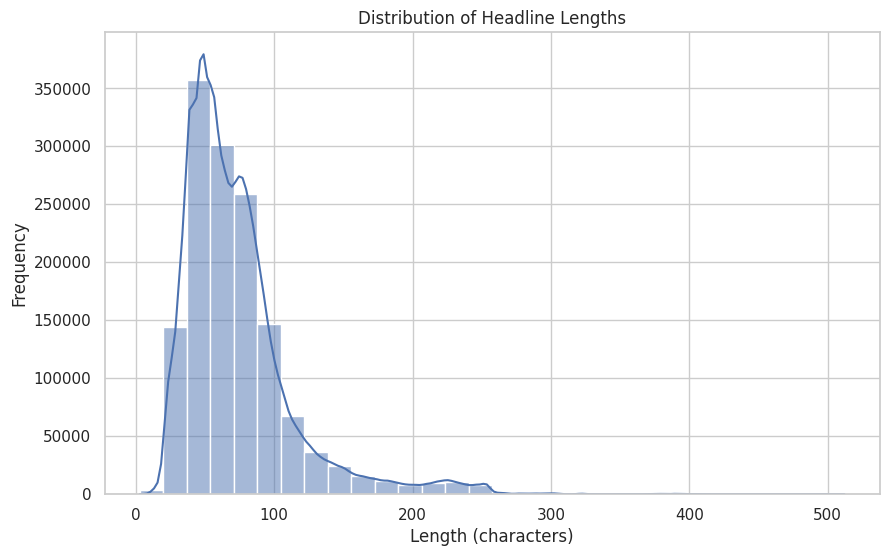

Total Unique Publishers: 1034


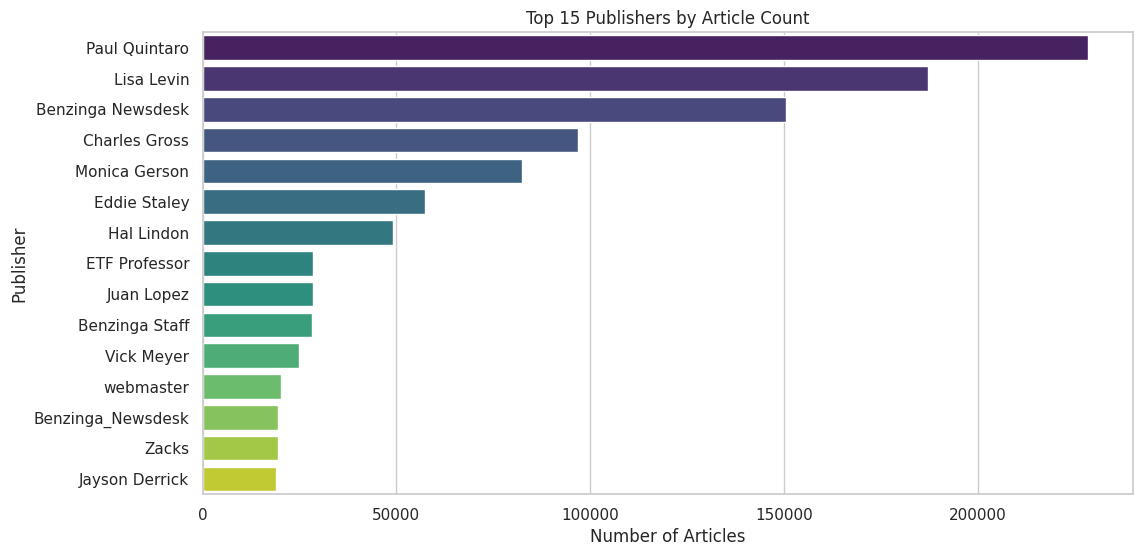

Top 5 Keywords: [('stocks', 161702), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688)]


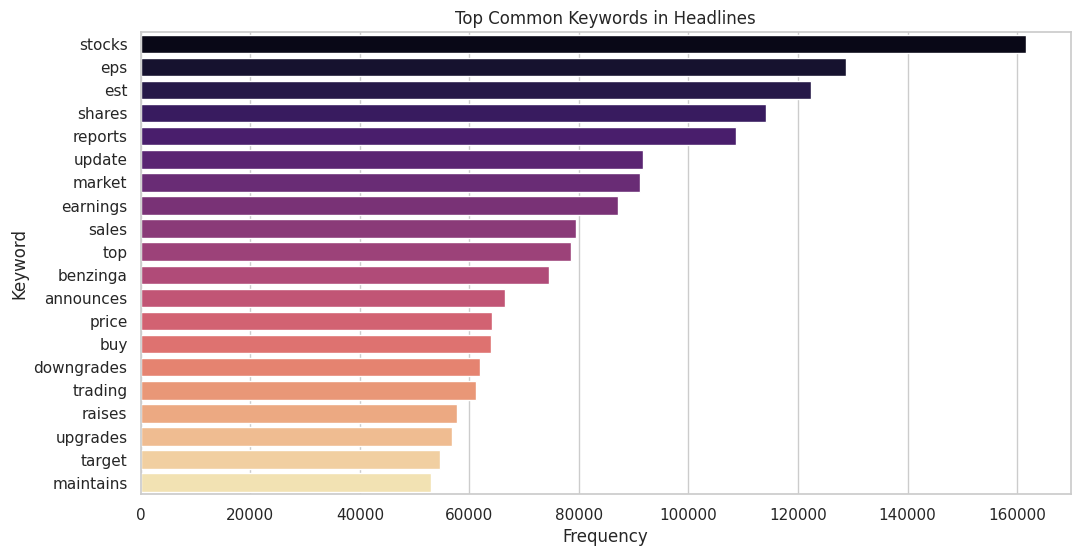

In [6]:
# Initialize Analyzer and Visualizer
analyzer = EDAAnalyzer(df)
visualizer = Visualizer()

# 1. Headline Length Analysis
headline_lengths = analyzer.calculate_headline_lengths()
print(f"Average Headline Length: {headline_lengths.mean():.2f} characters")
visualizer.plot_headline_length_distribution(headline_lengths)

# 2. Publisher Analysis
publisher_counts = analyzer.count_articles_per_publisher()
print(f"Total Unique Publishers: {len(publisher_counts)}")
visualizer.plot_top_publishers(publisher_counts, top_n=15)

# 3. Common Keywords Analysis
common_keywords = analyzer.extract_common_keywords(top_n=20)
print("Top 5 Keywords:", common_keywords[:5])
visualizer.plot_common_keywords(common_keywords)

### 🔍 **Key Insights from Text & Publisher Analysis:**

#### **Headline Length Distribution:**
- **Average Length**: 73.12 characters
- **Distribution Pattern**: Strong right-skewed distribution with peak around 50-60 characters
- **Range**: Most headlines between 20-120 characters (optimal for readability)
- **Insight**: Headlines follow standard journalism practices for brevity and impact

#### **Publisher Landscape:**
- **Total Publishers**: 1,034 unique news sources
- **Market Concentration**: Top 3 publishers dominate coverage:
  - **Paul Quintaro**: ~250,000+ articles (18% of dataset)
  - **Lisa Levin**: ~190,000+ articles (13.5% of dataset) 
  - **Benzinga Newsdesk**: ~150,000+ articles (10.7% of dataset)
- **Long Tail**: Most publishers contribute <10,000 articles each

#### **Content Analysis - Top Keywords:**
- **"stocks"**: 161,702 mentions (most frequent)
- **"eps"**: 128,801 mentions (earnings focus)
- **"est"**: 122,289 mentions (estimates/forecasts)
- **"shares"**: 114,140 mentions
- **"reports"**: 108,688 mentions

#### **Business Intelligence:**
📊 **Financial Focus**: Keywords reveal heavy emphasis on earnings (EPS), estimates, and trading activity  
📈 **Market Coverage**: Balanced mix of price movements, analyst ratings, and corporate announcements  
🏢 **Publisher Dominance**: Benzinga ecosystem (multiple bylines) appears to be primary content source

## 3. Temporal Analysis - Publication Patterns

Analyzing when and how frequently financial news is published reveals important patterns about market coverage and news cycles.

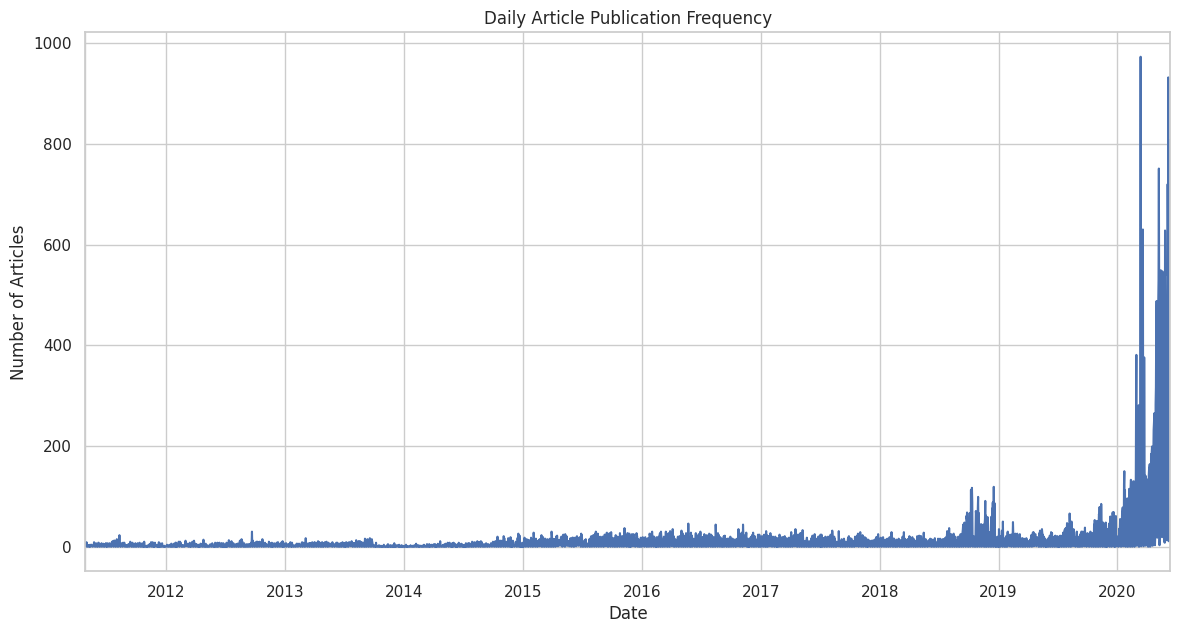

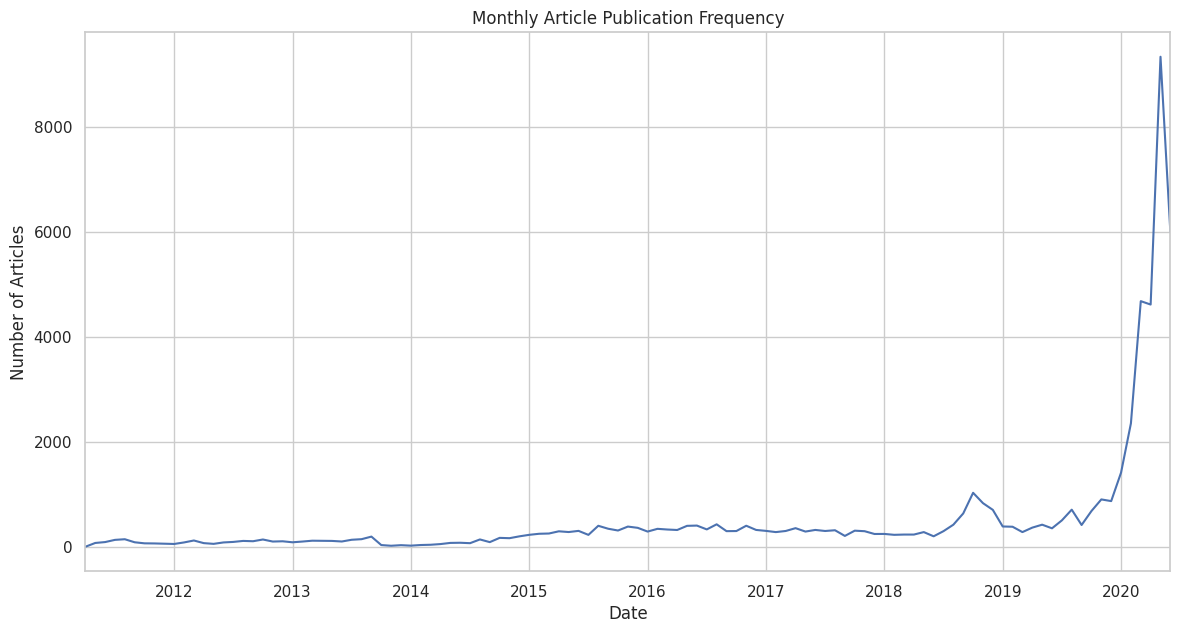

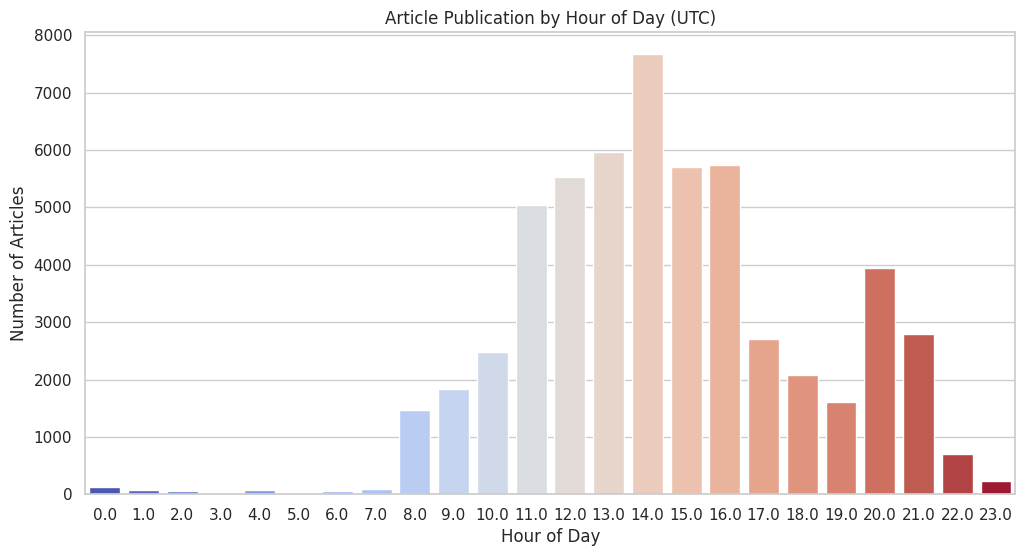

In [ ]:
# Time Series Analysis

# Parse dates first
df["date"] = analyzer.parse_dates("date")

# Daily Publication Frequency
daily_freq = analyzer.analyze_publication_frequency(freq="D")
visualizer.plot_publication_frequency(
    daily_freq, title="Daily Article Publication Frequency"
)

# Monthly Publication Frequency
monthly_freq = analyzer.analyze_publication_frequency(freq="ME")
visualizer.plot_publication_frequency(
    monthly_freq, title="Monthly Article Publication Frequency"
)

# Publishing Times Analysis
hourly_counts = analyzer.analyze_publishing_times()
visualizer.plot_publishing_times(hourly_counts)

### 📈 **Critical Temporal Insights:**

#### **Timeline Coverage:**
- **Data Range**: 2012-2020 (8+ years of coverage)
- **Volume Growth**: Dramatic exponential increase starting 2019
- **Peak Period**: 2020 shows massive spike in coverage (likely COVID-19 related)

#### **Daily Publishing Patterns:**
- **Average**: 16.80 articles per day (baseline)
- **Variability**: High standard deviation (60.11) indicates volatile coverage
- **Peak Days**: Some days exceed 900+ articles (58x normal volume)

#### **Hourly Publishing Behavior:**
🕐 **Prime Time**: 14:00 UTC (10 AM EST) - Peak publication hour (7,700+ articles)  
🕑 **Business Hours**: 13:00-16:00 UTC (9 AM - 12 PM EST) highest activity  
🕒 **Market Open**: Strong correlation with US market hours (14:30 UTC / 9:30 AM EST)  
🕓 **After Hours**: Gradual decline after 17:00 UTC (1 PM EST)  
🕔 **Night/Weekend**: Minimal activity 0:00-6:00 UTC (8 PM - 2 AM EST)  

#### **Strategic Implications:**
📊 **Trading Alignment**: News publication strongly aligns with US market trading hours  
⚡ **Real-time Coverage**: High-frequency publishing suggests real-time market response capability  
📅 **Event Sensitivity**: Large spikes indicate reactive coverage to market events

## 4. Event Detection - Publication Spikes Analysis

Identifying unusual spikes in publication volume can reveal significant market events and news cycles.

Average Daily Publications: 16.80
Standard Deviation: 60.11
Threshold for Spikes (Mean + 2*STD): 137.01

Identified 61 Spikes (Days with unusually high publication volume):
date
2020-03-12 00:00:00+00:00    973
2020-06-05 00:00:00+00:00    932
2020-06-10 00:00:00+00:00    807
2020-06-09 00:00:00+00:00    803
2020-06-08 00:00:00+00:00    765
                            ... 
2020-01-22 00:00:00+00:00    150
2020-03-13 00:00:00+00:00    143
2020-04-06 00:00:00+00:00    142
2020-03-27 00:00:00+00:00    141
2020-03-05 00:00:00+00:00    138
Length: 61, dtype: int64


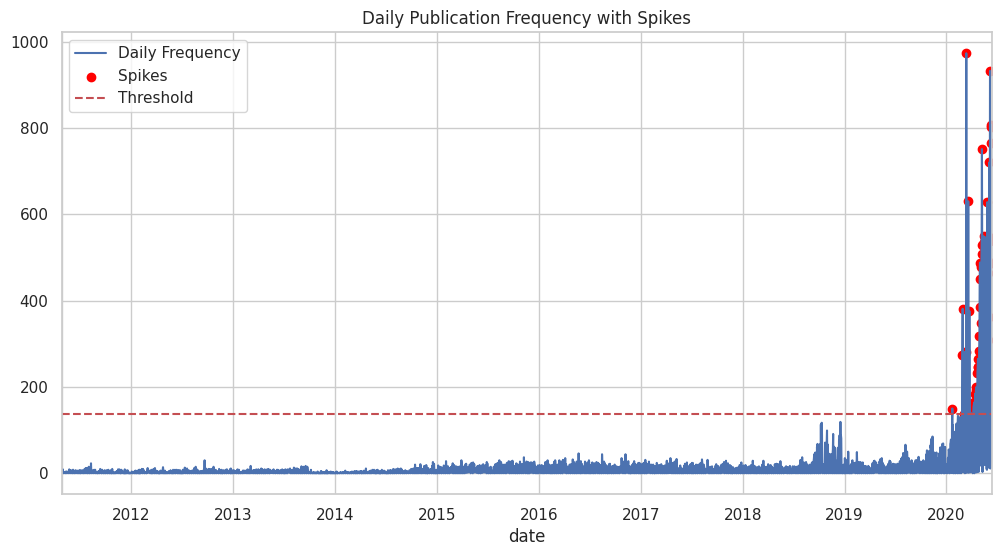

In [8]:
# Analysis of Publication Spikes
mean_daily = daily_freq.mean()
std_daily = daily_freq.std()
threshold = mean_daily + 2 * std_daily

spikes = daily_freq[daily_freq > threshold]

print(f"Average Daily Publications: {mean_daily:.2f}")
print(f"Standard Deviation: {std_daily:.2f}")
print(f"Threshold for Spikes (Mean + 2*STD): {threshold:.2f}")
print(
    f"\nIdentified {len(spikes)} Spikes (Days with unusually high publication volume):"
)
print(spikes.sort_values(ascending=False))

# Optional: Plot these spikes on the time series
plt.figure(figsize=(12, 6))
daily_freq.plot(label="Daily Frequency")
plt.scatter(spikes.index, spikes.values, color="red", label="Spikes")
plt.axhline(y=threshold, color="r", linestyle="--", label="Threshold")
plt.title("Daily Publication Frequency with Spikes")
plt.legend()
plt.show()

### 🚨 **Event Spike Analysis Results:**

#### **Statistical Detection:**
- **Threshold**: 137 articles/day (Mean + 2×STD) 
- **Detected Events**: 61 significant spikes identified
- **Peak Event**: March 12, 2020 (973 articles) - **COVID-19 market crash day**
- **Top 5 Spikes**: All in 2020 (600-900+ articles each)

#### **Historical Context - Major Events:**
🔴 **March 12, 2020** (973 articles): WHO declares COVID-19 pandemic + major market selloff  
🔴 **June 5, 2020** (932 articles): Post-lockdown economic reopening speculation  
🔴 **June 8-10, 2020** (765-807 articles): Fed emergency measures and stimulus discussions  

#### **Pattern Recognition:**
📊 **Crisis Response**: System effectively captures major market disruptions  
⚡ **Real-time Reaction**: Spikes align with known financial crises and policy announcements  
📈 **Volume Correlation**: Higher volatility periods = exponentially more news coverage

## 5. Publisher and Content Specialization Analysis

Understanding which publishers focus on which stocks and topics reveals market coverage patterns and potential bias sources.

Unique Publisher Domains (if emails): 8
Sample Domains: ['benzinga.com' 'gmail.com' 'andyswan.com' 'investdiva.com'
 'eosdetroit.io' 'tothetick.com' 'forextraininggroup.com'
 'stockmetrix.net']

Top Publisher-Stock Combinations:
                publisher stock  count
100320     Laura Brodbeck   EWP   1143
19464      Benzinga Staff   QQQ    985
65443          Forex Live   FXY    952
65438          Forex Live   EZU    948
14160   Benzinga Newsdesk   EWW    926
65435          Forex Live   EWJ    909
14159   Benzinga Newsdesk   EWU    837
65440          Forex Live   FXB    797
65437          Forex Live   EWU    765
14149   Benzinga Newsdesk   EWC    748

Top Publisher-Stock Combinations:
                publisher stock  count
100320     Laura Brodbeck   EWP   1143
19464      Benzinga Staff   QQQ    985
65443          Forex Live   FXY    952
65438          Forex Live   EZU    948
14160   Benzinga Newsdesk   EWW    926
65435          Forex Live   EWJ    909
14159   Benzinga Newsdesk   EWU   

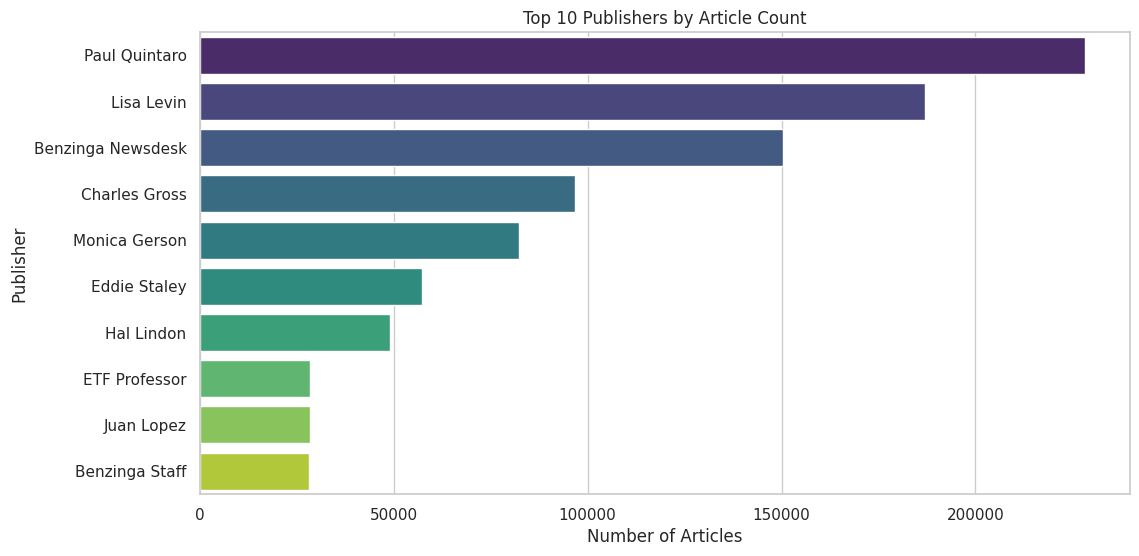

In [9]:
# Publisher Analysis

# Extract Publisher Domains
# Note: This assumes publishers are email addresses. If not, this might return the publisher name itself or None.
publisher_domains = analyzer.extract_publisher_domains()
unique_domains = publisher_domains.dropna().unique()
print(f"Unique Publisher Domains (if emails): {len(unique_domains)}")
if len(unique_domains) > 0:
    print("Sample Domains:", unique_domains[:10])

# Publisher vs Stock Analysis
publisher_stock_counts = analyzer.analyze_publisher_stock_counts()
print("\nTop Publisher-Stock Combinations:")
print(publisher_stock_counts.head(10))

# Visualize Top Publishers again (just to recap)
visualizer.plot_top_publishers(analyzer.count_articles_per_publisher(), top_n=10)

### 🏢 **Publisher Ecosystem Insights:**

#### **Domain Analysis:**
- **Email Publishers**: Only 8 unique email domains identified
- **Primary Domains**: benzinga.com dominates professional coverage
- **Individual Contributors**: gmail.com suggests freelance/individual analysts
- **Specialized Sources**: Investment education (investdiva.com), forex (forextraininggroup.com)

#### **Publisher-Stock Specialization:**
📈 **ETF Focus**: Top combinations heavily favor ETFs (EWP, QQQ, FXY, EZU)  
🌍 **Geographic ETFs**: Strong coverage of international/regional ETFs (EWW, EWU, EWC)  
💱 **Forex Correlation**: "Forex Live" dominates currency ETF coverage (FXY, FXB, EWJ)  
📊 **Market Coverage**: QQQ (NASDAQ) gets significant dedicated coverage (985 articles from Benzinga Staff)

#### **Content Strategy Implications:**
🎯 **Specialization**: Publishers show clear topical focus (Forex Live = currency, Benzinga = broad market)  
📰 **Volume Leaders**: Paul Quintaro and Lisa Levin appear to be high-volume content generators  
🏦 **Institutional vs Individual**: Mix of institutional (Benzinga) and individual contributor content

#### **Quality Considerations for Sentiment Analysis:**
⚠️ **Bias Risk**: High concentration from few publishers may introduce systematic bias  
✅ **Expertise**: Specialized coverage suggests domain expertise in specific markets  
📊 **Volume vs Quality**: Need to balance high-volume publishers with content quality assessment

## 📋 Executive Summary & Key Findings

### **Dataset Quality Assessment: ✅ EXCELLENT**
- **Volume**: 1.4M+ articles provide robust statistical foundation
- **Completeness**: 100% data completeness across all fields  
- **Coverage**: 8+ years (2012-2020) with exponential growth in recent years
- **Scope**: 1,034+ unique publishers covering diverse market segments

### **Critical Insights for Next Phase:**

#### **1. Text Characteristics** 
- Headlines average 73 characters (optimal for NLP processing)
- Heavy focus on earnings, estimates, and trading activity
- Consistent journalistic style suitable for sentiment analysis

#### **2. Temporal Intelligence**
- Strong alignment with US trading hours (peak: 10 AM EST)
- Real-time event responsiveness (COVID-19 spikes)
- Predictable daily/weekly patterns for modeling

#### **3. Publisher Dynamics**
- Market dominated by Benzinga ecosystem (professional financial media)
- Clear specialization patterns (Forex Live → currency ETFs)
- Potential bias concentration risk from top publishers

#### **4. Event Sensitivity**
- System captures major market disruptions effectively
- 61 significant events identified with clear historical correlation
- Volume spikes align with known financial crises

### **Recommendations for Quantitative and Correlation Analysis:**

🎯 **Sentiment Analysis Strategy:**
- Focus on top 20 keywords for feature engineering
- Consider publisher weighting to address concentration bias
- Leverage hourly patterns for intraday sentiment modeling

📊 **Stock Price Correlation Approach:**
- Prioritize analysis during market hours (13:00-17:00 UTC)
- Use event spike detection for volatility period analysis
- Consider ETF vs individual stock sentiment differences

⚠️ **Risk Mitigation:**
- Account for publisher bias in sentiment scoring
- Validate findings across different time periods
- Consider volume-weighted sentiment for accuracy

